<a href="https://colab.research.google.com/github/Namesakenberg/machine_learning/blob/main/Kernel_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Text(0.5, 1.0, 'Original data')

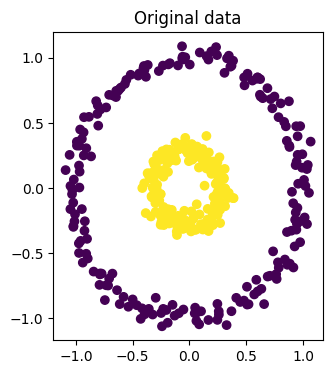

In [1]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, KernelPCA
from sklearn.datasets import make_circles
import numpy as np

# Generate the dataset
X, y = make_circles(n_samples=400, factor=.3, noise=.05)

# Original data plot
plt.figure(figsize=(16, 4))
plt.subplot(1, 4, 1)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title('Original data')

In [2]:
print(X.shape)
print(y.shape)

# data has 400 rows and has 2 columns

(400, 2)
(400,)


## task is to find a single column from the 2  input columns which would give the best separation of the 2 classes (yellow and purple)

In [3]:
X_centered = X - np.mean(X, axis=0)

Text(0.5, 1.0, 'Original data')

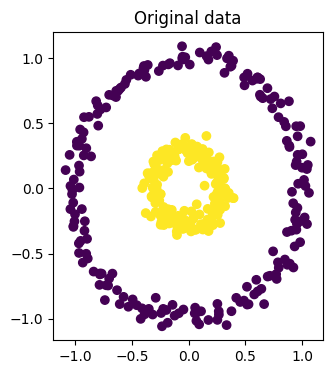

In [4]:
plt.figure(figsize=(16, 4))
plt.subplot(1, 4, 1)
plt.scatter(X_centered[:, 0], X_centered[:, 1], c=y)
plt.title('Original data')

In [5]:
# applying the Kernal PCA
def rbf_kernel(x1, x2, gamma=0.1):
    distance = np.linalg.norm(x1 - x2) ** 2
    return np.exp(-gamma * distance)

# Create the kernel matrix
n_samples = X.shape[0]
K = np.zeros((n_samples, n_samples))
for i in range(n_samples):
    for j in range(n_samples):
        K[i, j] = rbf_kernel(X_centered[i], X_centered[j])



In [6]:
K.shape

(400, 400)

In [7]:
from scipy.linalg import eigh
eigenvalues, eigenvectors = eigh(K)

In [8]:
eigenvectors.shape

(400, 400)

In [9]:
eigenvalues.shape

(400,)

In [10]:
# the scipy eigh gives the eigen values and the eigen vectors in the acending order
# hence the largest eigen values and the eigen vectors are at the end
# hence reverse the arrays to access them eaisly

In [11]:
# Reverse the arrays as eigh returns them in ascending order
eigenvalues = eigenvalues[::-1]
eigenvectors = eigenvectors[:, ::-1]

In [12]:
k = 2
X_kpca = eigenvectors[:, :k]

In [13]:
X_kpca.shape

(400, 2)

Text(0.5, 1.0, 'Data after Kernel PCA in 1D')

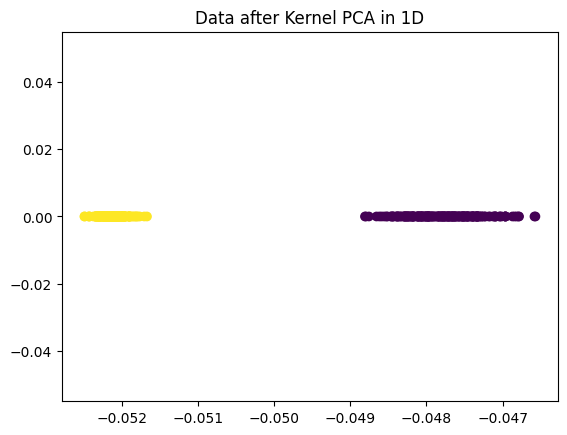

In [14]:
plt.scatter(X_kpca[:, 0], np.zeros((400,)), c=y)
plt.title('Data after Kernel PCA in 1D')